In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from pyproj import Geod
import folium   # using folium to display the data on a map

In [2]:
%run load_data.ipynb 

In [3]:
data = load_processed_data()

In [23]:
data['week_no'] = data.started_at.dt.week

In [7]:
data_daily = data.groupby(["date"]).started_at.count()

In [54]:
# get df for weekly data, take the first date of each week as label
data_weekly = data.groupby(['year','week_no'])[['started_at']].agg(['count','first']).reset_index()

# rename the multilevel columns to a combination of the two levels 
data_weekly.columns = ['_'.join(tup) if tup[1] != '' else tup[0] for tup in list(data_weekly.columns)]

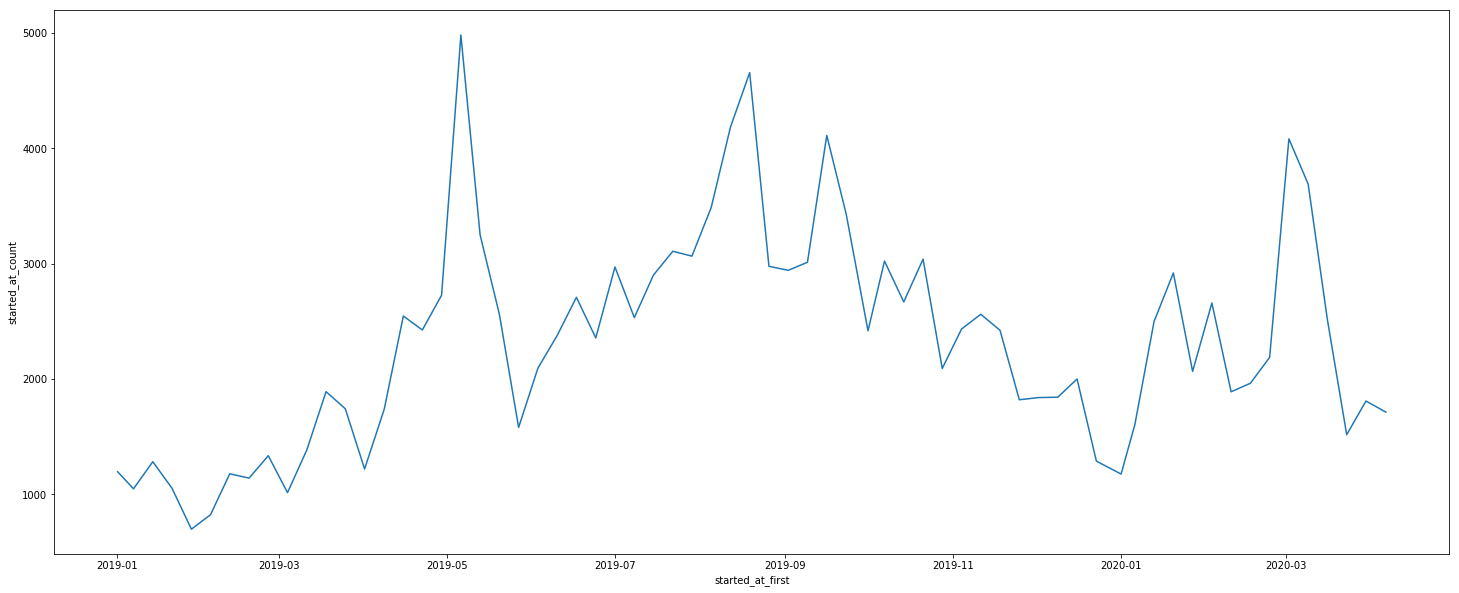

In [52]:
# plot the weekly bike data with first date of week

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.lineplot(x=data_weekly.started_at_first, y=data_weekly.started_at_count, ax=ax)
plt.show()

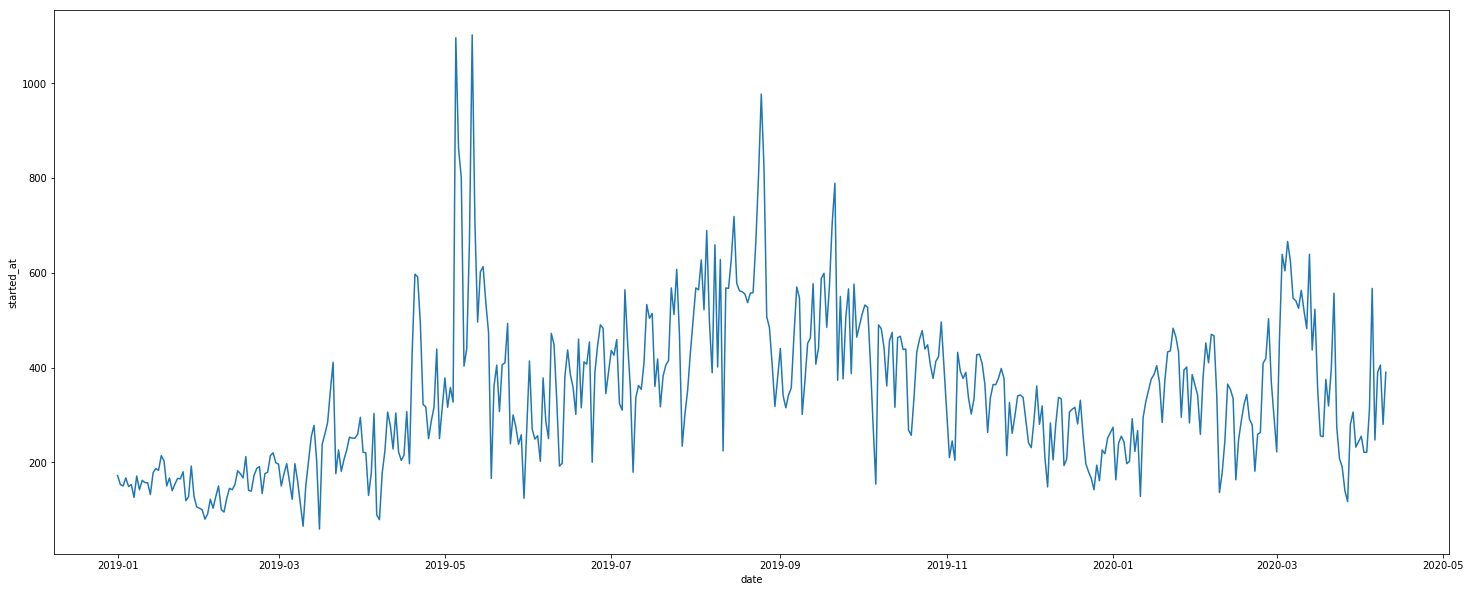

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.lineplot(x=data_daily.index, y=data_daily, ax=ax)
plt.show()